# Western Power datascience competition Task 0

## Introduction

## Objective

## Visualization of input data

### import python packages

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

### Load Dataset

In [2]:
demand_train_set0 = pd.read_csv('Input/demand_train_set0.csv')
demand_train_set0.head()

,datetime,demand_MW
0,2017-11-03 00:00:00,2.19
1,2017-11-03 00:30:00,2.14
2,2017-11-03 01:00:00,2.01
3,2017-11-03 01:30:00,1.87
4,2017-11-03 02:00:00,1.86


In [4]:
pv_train_set0 = pd.read_csv('Input/pv_train_set0.csv')
pv_train_set0.head()

,datetime,irradiance_Wm-2,pv_power_mw,panel_temp_C
0,2017-11-03 00:00:00,0.0,0.0,7.05
1,2017-11-03 00:30:00,0.0,0.0,7.38
2,2017-11-03 01:00:00,0.0,0.0,7.70
3,2017-11-03 01:30:00,0.0,0.0,7.48
4,2017-11-03 02:00:00,0.0,0.0,7.20


In [5]:
weather_train_set0 = pd.read_csv('Input/weather_train_set0.csv')
weather_train_set0.head()

,datetime,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1
0,2015-01-01 00:00:00,8.83,11.22,9.65,7.58,11.62,9.75,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,8.90,11.32,9.76,7.62,11.65,9.91,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 02:00:00,9.10,11.30,9.80,7.61,11.65,9.99,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 03:00:00,9.35,11.25,10.02,8.11,11.70,10.17,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 04:00:00,9.52,11.32,10.13,8.57,11.79,10.40,0.0,0.0,0.0,0.0,0.0,0.0


### Plot head of input data

<function matplotlib.pyplot.show(close=None, block=None)>

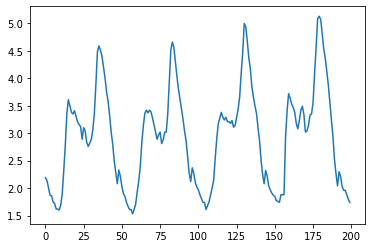

In [13]:
plt.plot(demand_train_set0['demand_MW'][:200])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

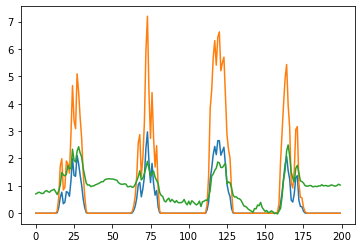

In [19]:
plt.plot(pv_train_set0['pv_power_mw'][:200])
plt.plot(pv_train_set0['irradiance_Wm-2'][:200]/100)
plt.plot(pv_train_set0['panel_temp_C'][:200]/10)
plt.show

### Definition of time parameters

In [25]:
demand_train_set0.iloc[12575]

datetime     2018-07-22 23:30:00
demand_MW                   1.63
Name: 12575, dtype: object

In [31]:
days_number = demand_train_set0.shape[0]/48
days_number

262.0

In [36]:
weeks_number = days_number//7
weeks_number

37.0

- First day : Friday, November 2017-11-03 -> d = 5
- last day : Sunday, Jully 2018-07-22 -> d = 7
- weeks number : 37 weeks

- d : vector of day (1,2,3,4,5,6,7)
- C : battery charging matrix
- B : matrix of the power used by the battery
- L : power demand matrix
- P : photovoltaic power matrix
- G : grid power matrix
- Cmax: maximum battery charge (6 MWh)
- Bmin : minimum battery power flow
- Bmax : maximum battery power flow

In [44]:
d = [1, 2, 3, 4, 5, 6, 7]
B = pd.DataFrame(columns=['half_hour'], data= np.arange(0,48)) 
for i in d:
    B['day_{}'.format(i)] = 0
B.set_index('half_hour',  inplace=True)
B

,day_1,day_2,day_3,day_4,day_5,day_6,day_7
half_hour,,,,,,,
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0


### First week 